In [50]:
import sys
import os
from pathlib import Path

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)


DATA_DIR_ENV = os.getenv("TAU2_DATA_DIR")

if DATA_DIR_ENV:
    data_dir = Path(DATA_DIR_ENV)
else:
    # Fallback to source directory (for development)
    repo_root = str(Path(notebook_dir).parent)
    data_dir = f"{repo_root}/data"


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [52]:
%load_ext autoreload
%autoreload 2

# General Analysis
- Read the evaluation results
- Eval results are stored in a structure json file, and there is a shortcut utility to convert this to a dataframe.
- Keep only relevant columns 


In [ ]:
from tau2.data_model.simulation import Results

grok_airline_results = Results.load(
    Path(f"{data_dir}/simulations/grok_airline_all.json")
)

grok_airline_results_df = grok_airline_results.to_df()

print(grok_airline_results_df.shape)
print(grok_airline_results_df.columns)

(250, 27)
Index(['simulation_id', 'task_id', 'trial', 'seed', 'reward', 'agent_cost',
       'user_cost', 'termination_reason', 'duration', 'num_messages',
       'info_git_commit', 'info_seed', 'info_num_trials', 'info_max_steps',
       'info_max_errors', 'info_domain', 'info_user_implementation',
       'info_user_llm', 'info_user_llm_args', 'info_agent_implementation',
       'info_agent_llm', 'info_agent_llm_args', 'task_num_agent_actions',
       'task_num_user_actions', 'task_num_actions', 'task_num_env_assertions',
       'task_num_nl_assertions'],
      dtype='object')


In [28]:
grok_airline_results_df.head()

,simulation_id,task_id,trial,seed,reward,agent_cost,user_cost,termination_reason,duration,num_messages,...,info_user_llm,info_user_llm_args,info_agent_implementation,info_agent_llm,info_agent_llm_args,task_num_agent_actions,task_num_user_actions,task_num_actions,task_num_env_assertions,task_num_nl_assertions
0,f8fdc8d8-2d0a-409c-b41b-027a87ada931,0,0,626729,1.0,0.005671,0.000802,TerminationReason.USER_STOP,15.093967,10,...,xai/grok-4-fast-reasoning,{'temperature': 0.0},llm_agent,xai/grok-4-fast-reasoning,{'temperature': 0.0},0,0,0,0,1
1,c8986318-6fe4-4f73-a08e-8adac924fb3e,1,0,626729,1.0,0.015513,0.001152,TerminationReason.USER_STOP,22.895670,22,...,xai/grok-4-fast-reasoning,{'temperature': 0.0},llm_agent,xai/grok-4-fast-reasoning,{'temperature': 0.0},2,0,2,0,1
2,8859a58e-afc0-499e-93ef-327331533127,3,0,626729,1.0,0.009049,0.001607,TerminationReason.USER_STOP,22.764926,14,...,xai/grok-4-fast-reasoning,{'temperature': 0.0},llm_agent,xai/grok-4-fast-reasoning,{'temperature': 0.0},2,0,2,0,2
3,0b89b572-ee64-42ae-8556-fcc362602314,4,0,626729,1.0,0.018365,0.001883,TerminationReason.USER_STOP,31.408852,24,...,xai/grok-4-fast-reasoning,{'temperature': 0.0},llm_agent,xai/grok-4-fast-reasoning,{'temperature': 0.0},6,0,6,0,2
4,6571f0cf-9663-43b5-afdc-21392fd57b95,2,0,626729,1.0,0.021557,0.005920,TerminationReason.USER_STOP,65.517945,28,...,xai/grok-4-fast-reasoning,{'temperature': 0.0},llm_agent,xai/grok-4-fast-reasoning,{'temperature': 0.0},4,0,4,0,4


In [172]:
grok_airline_results_df["task_num_actions"].describe()

count    250.00000
mean       2.92000
std        3.52182
min       -1.00000
25%        1.00000
50%        2.00000
75%        4.00000
max       20.00000
Name: task_num_actions, dtype: float64

In [ ]:
relevant_columns = [
    "task_id",
    "trial",
    "reward",
    "agent_cost",
    "user_cost",
    "duration",
    "num_messages",
    "task_num_agent_actions",
    "termination_reason",
    "task_num_actions"
    # "task_num_user_actions", # Always 0 for airline
]

filtered_airline_results = grok_airline_results_df[relevant_columns]
filtered_airline_results.head()

,task_id,trial,reward,agent_cost,user_cost,duration,num_messages,task_num_agent_actions,termination_reason,task_num_actions
0,0,0,1.0,0.005671,0.000802,15.093967,10,0,TerminationReason.USER_STOP,0
1,1,0,1.0,0.015513,0.001152,22.895670,22,2,TerminationReason.USER_STOP,2
2,3,0,1.0,0.009049,0.001607,22.764926,14,2,TerminationReason.USER_STOP,2
3,4,0,1.0,0.018365,0.001883,31.408852,24,6,TerminationReason.USER_STOP,6
4,2,0,1.0,0.021557,0.005920,65.517945,28,4,TerminationReason.USER_STOP,4


In [174]:
filtered_airline_results = filtered_airline_results[filtered_airline_results["trial"] != 4]
print(filtered_airline_results.shape)

(200, 10)


<Axes: xlabel='trial', ylabel='reward'>

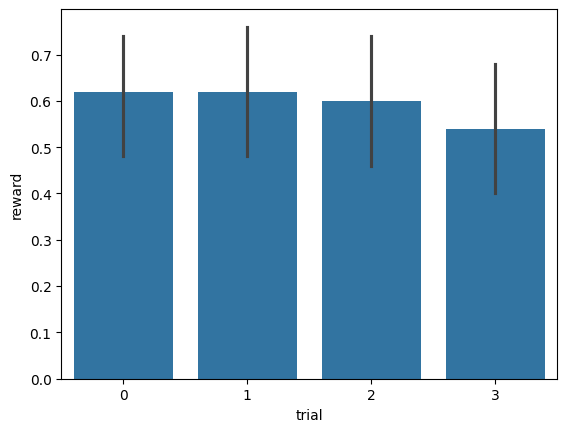

In [94]:
sns.barplot(x="trial", y="reward", data=filtered_airline_results)

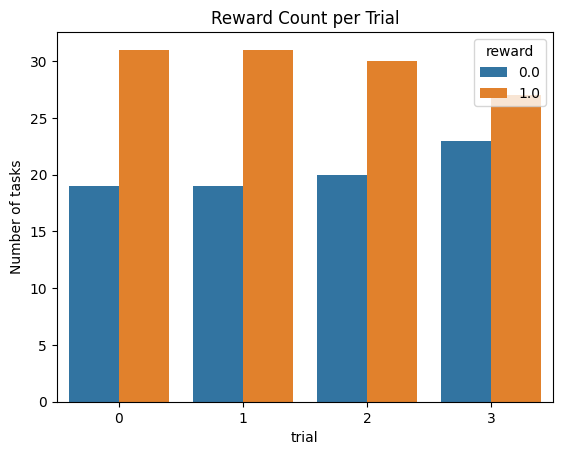

In [95]:
reward_grouped = filtered_airline_results.groupby(["trial", "reward"])["task_id"].count().reset_index()
reward_grouped = reward_grouped.rename(columns={"task_id": "count"})

sns.barplot(x="trial", y="count", hue="reward", data=reward_grouped)
plt.title("Reward Count per Trial")
plt.ylabel("Number of tasks")
plt.show()


In [96]:
def plot_col_dist_by_reward_vals(col_name: str, df: pd.DataFrame):
    plt.figure(figsize=(10,6))
    sns.histplot(
        df[df["reward"] == 0.0][col_name],
        label="reward=0",
        kde=True,
        stat="density",
        color="r",
        alpha=0.3,
        bins=15
    )

    sns.histplot(
        df[df["reward"] == 1.0][col_name],
        label="reward=1",
        kde=True,
        stat="density",
        color="g",
        alpha=0.3,
        bins=15
    )

    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel("Density")
    plt.title(f"Distribution of {col_name} for reward=0 vs reward=1")
    plt.show()

Reward vs num_messages observation:
- When the reward is 1 or success, the distribution is concentrated on the lower range for `num_messages`. This peaks around 10-20 messages.
- Failed tasks have longer right tail with density extending from 25-50+ messages.

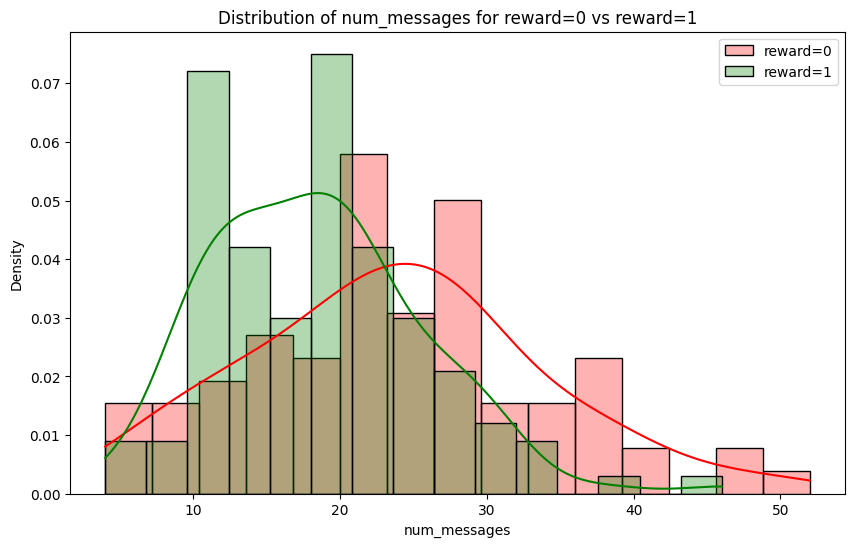

In [97]:
plot_col_dist_by_reward_vals("num_messages", filtered_airline_results)

Reward vs `task_num_agent_actions` observations: 
-  When the reward is 1 or success, observation is seen from the `task_num_agent_actions`. 
- Reward=1 is highly concentrated around 1-2 agent actions.
- The failure cases have high variances. Some tasks fail with few actions while others take up 20 actions

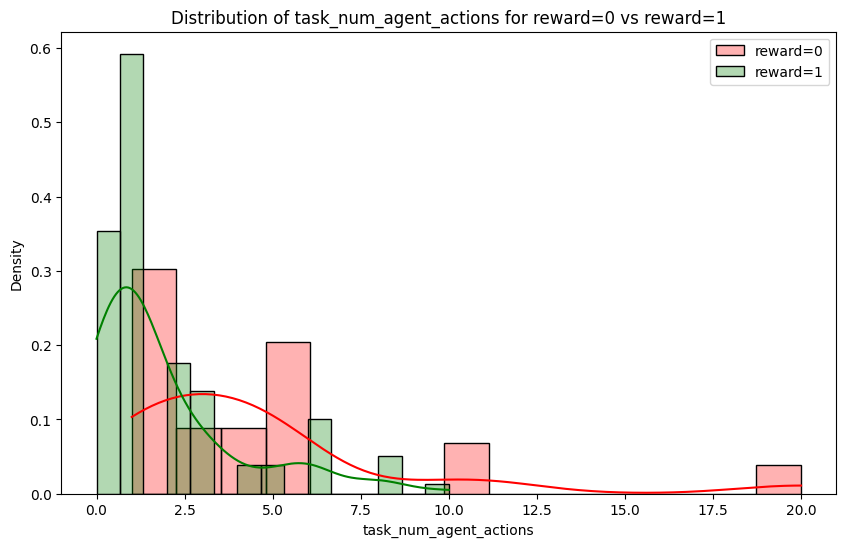

In [98]:
plot_col_dist_by_reward_vals("task_num_agent_actions", filtered_airline_results)

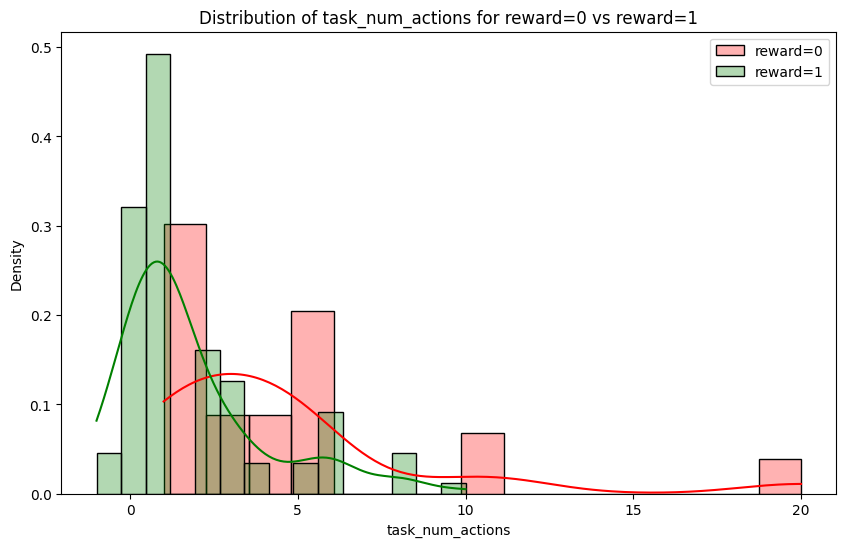

In [175]:
plot_col_dist_by_reward_vals("task_num_actions", filtered_airline_results)

<Axes: xlabel='task_num_actions', ylabel='Count'>

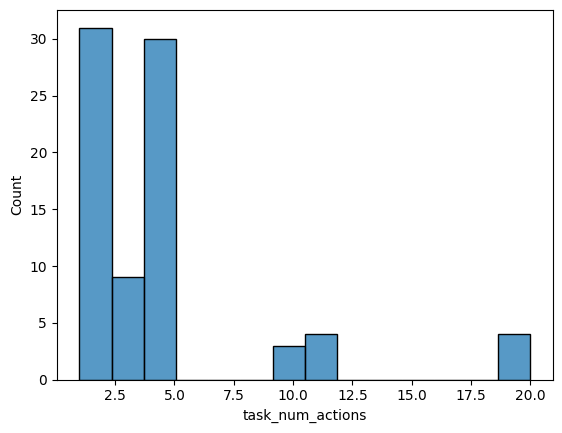

In [179]:
## Transfers

sns.histplot(filtered_airline_results[filtered_airline_results.reward == 0].task_num_actions)
# sns.histplot(filtered_airline_results[filtered_airline_results.reward == 1].task_num_actions)


In [ ]:
## This can be safely ignored
filtered_airline_results["termination_reason"].value_counts()

termination_reason
TerminationReason.USER_STOP    250
Name: count, dtype: int64

## Task category classification

In [ ]:
from airline_agent_eval_task_classifier import AirlineAgentEvalTaskClassifier

task_classifier = AirlineAgentEvalTaskClassifier(domain_dir=f"{data_dir}/tau2/domains/airline")
task_id_category = task_classifier.run(save_to_path=f"{data_dir}/experiments/domains/airline/task_category_mapping.json")

In [74]:
task_id_category_df = pd.DataFrame(
    [{"task_id": int(k), "category": str(v)} for k, v in task_id_category.items()]
)
task_id_category_df.head()

,task_id,category
0,0,Cancellation Policy Tricking
1,1,Cancellation Policy Tricking
2,2,Compensation/Complaints Tricking
3,3,Membership & Benefits
4,4,Compensation/Complaints Tricking


In [75]:
task_id_category_df["category"].value_counts()

category
Flight Modification                   11
Cancellation Policy Tricking           9
Complex Multi-Transaction              8
Flight Modification Tricking           6
Compensation/Complaints Tricking       4
Booking Creation                       3
Complex Multi-Transaction Tricking     3
Cancellation Policy                    2
Membership & Benefits                  1
Insurance Issues Tricking              1
Compensation/Complaints                1
Insurance Issues                       1
Name: count, dtype: int64

### Merge categories to tasks

In [183]:
filtered_airline_results["task_id"] = filtered_airline_results["task_id"].astype(int)

In [184]:

task_with_categories = filtered_airline_results.merge(
    task_id_category_df,
    on="task_id",
    how="inner"
)
task_with_categories.head()
# failed_task_trials_with_categories.sort_values(by="trial_count", ascending=False)

,task_id,trial,reward,agent_cost,user_cost,duration,num_messages,task_num_agent_actions,termination_reason,task_num_actions,category
0,0,0,1.0,0.005671,0.000802,15.093967,10,0,TerminationReason.USER_STOP,0,Cancellation Policy Tricking
1,1,0,1.0,0.015513,0.001152,22.895670,22,2,TerminationReason.USER_STOP,2,Cancellation Policy Tricking
2,3,0,1.0,0.009049,0.001607,22.764926,14,2,TerminationReason.USER_STOP,2,Membership & Benefits
3,4,0,1.0,0.018365,0.001883,31.408852,24,6,TerminationReason.USER_STOP,6,Compensation/Complaints Tricking
4,2,0,1.0,0.021557,0.005920,65.517945,28,4,TerminationReason.USER_STOP,4,Compensation/Complaints Tricking


In [185]:
success_counts = task_with_categories[task_with_categories.reward == 1]["category"].value_counts()
total_counts = task_with_categories["category"].value_counts()
success_ratio = (success_counts / total_counts) * 100

In [186]:
success_summary_df = pd.DataFrame({
    'success_count': success_counts,
    'total_count': total_counts,
    'success_ratio': success_ratio
}).fillna(0.0)

success_summary_df = success_summary_df.sort_values(by="success_ratio", ascending=False)
success_summary_df


,success_count,total_count,success_ratio
category,,,
Cancellation Policy,8.0,8,100.000000
Insurance Issues,4.0,4,100.000000
Insurance Issues Tricking,4.0,4,100.000000
Membership & Benefits,4.0,4,100.000000
Cancellation Policy Tricking,32.0,36,88.888889
Flight Modification,29.0,44,65.909091
Booking Creation,7.0,12,58.333333
Flight Modification Tricking,14.0,24,58.333333
Compensation/Complaints Tricking,9.0,16,56.250000


### Task Complexity metrics

In [187]:
# Quantify task complexity as a linear combination of the normalized z-score of the task_num_agent_actions, num_messages, and duration
task_with_categories['task_num_agent_actions_std'] = (
    (task_with_categories['task_num_agent_actions'] - task_with_categories['task_num_agent_actions'].mean()) /
    task_with_categories['task_num_agent_actions'].std()
)
task_with_categories['num_messages_std'] = (
    (task_with_categories['num_messages'] - task_with_categories['num_messages'].mean()) /
    task_with_categories['num_messages'].std()
)
task_with_categories['duration_std'] = (
    (task_with_categories['duration'] - task_with_categories['duration'].mean()) /
    task_with_categories['duration'].std()
)

# Linear combination of standardized values
task_with_categories['task_complexity_zscore'] = (
    task_with_categories['task_num_agent_actions_std'] +
    task_with_categories['num_messages_std'] +
    task_with_categories['duration_std']
) / 3

# TODO: Try a weighted log metric
# task_with_categories["task_complexity_log"] = np.log1p(task_with_categories["task_num_agent_actions"] * task_with_categories["num_messages"] * task_with_categories["duration"])

task_with_categories

,task_id,trial,reward,agent_cost,user_cost,duration,num_messages,task_num_agent_actions,termination_reason,task_num_actions,category,task_num_agent_actions_std,num_messages_std,duration_std,task_complexity_zscore
0,0,0,1.0,0.005671,0.000802,15.093967,10,0,TerminationReason.USER_STOP,0,Cancellation Policy Tricking,-0.848166,-1.196623,-0.929267,-0.991352
1,1,0,1.0,0.015513,0.001152,22.895670,22,2,TerminationReason.USER_STOP,2,Cancellation Policy Tricking,-0.275081,0.161889,-0.565259,-0.226150
2,3,0,1.0,0.009049,0.001607,22.764926,14,2,TerminationReason.USER_STOP,2,Membership & Benefits,-0.275081,-0.743786,-0.571360,-0.530075
3,4,0,1.0,0.018365,0.001883,31.408852,24,6,TerminationReason.USER_STOP,6,Compensation/Complaints Tricking,0.871089,0.388308,-0.168056,0.363780
4,2,0,1.0,0.021557,0.005920,65.517945,28,4,TerminationReason.USER_STOP,4,Compensation/Complaints Tricking,0.298004,0.841146,1.423390,0.854180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,46,3,1.0,0.002695,0.000453,6.851082,6,0,TerminationReason.USER_STOP,0,Insurance Issues,-0.848166,-1.649461,-1.313860,-1.270495
196,42,3,0.0,0.020883,0.003715,40.908854,26,10,TerminationReason.USER_STOP,10,Complex Multi-Transaction,2.017259,0.614727,0.275191,0.969059
197,47,3,1.0,0.009013,0.001383,20.953425,14,1,TerminationReason.USER_STOP,1,Cancellation Policy Tricking,-0.561623,-0.743786,-0.655880,-0.653763
198,48,3,1.0,0.009393,0.001244,24.058232,16,1,TerminationReason.USER_STOP,1,Cancellation Policy Tricking,-0.561623,-0.517367,-0.511017,-0.530002


<Axes: xlabel='task_complexity_zscore', ylabel='Count'>

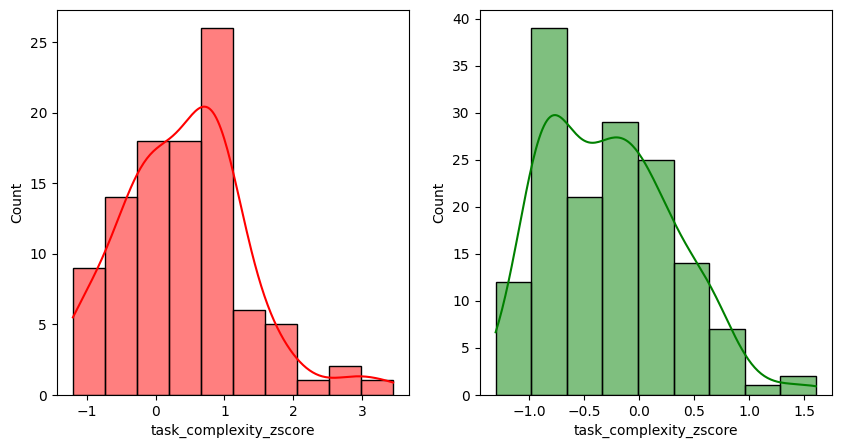

In [162]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(
    data=task_with_categories[task_with_categories["reward"] == 0]["task_complexity_zscore"],
    ax=axs[0],
    kde=True,
    color="red",
)
sns.histplot(
    data=task_with_categories[task_with_categories["reward"] == 1]["task_complexity_zscore"],
    ax=axs[1],
    kde=True,
    color="green",
)


In [ ]:
from scipy.stats import mannwhitneyu

complexity_metrics = [
    "task_num_agent_actions",
    "num_messages",
    "duration",
    "task_complexity_zscore",
]

results = []

for metric in complexity_metrics:
    group0 = task_with_categories[task_with_categories["reward"] == 0][metric]
    group1 = task_with_categories[task_with_categories["reward"] == 1][metric]
    # use Mann-Whitney U test to compare 2 groups since the data is skewed for reward=0
    u, p = mannwhitneyu(group0, group1, alternative="two-sided")
    results.append({
        "metric": metric,
        "u_statistic": u,
        "p_value": p,
        "mean_reward_0": group0.mean(),
        "mean_reward_1": group1.mean(),
        "median_reward_0": group0.median(),
        "median_reward_1": group1.median(),
        "significant": p < 0.05,
    })

pval_df = pd.DataFrame(results)
pval_df



,metric,u_statistic,p_value,mean_reward_0,mean_reward_1,median_reward_0,median_reward_1,significant
0,task_num_agent_actions,11297.5,4.417472e-12,4.510000,1.926667,4.000000,1.000000,True
1,num_messages,10385.0,2.501504e-07,24.070000,18.233333,24.000000,18.000000,True
2,duration,10070.0,4.490241e-06,42.636599,29.452087,39.718672,26.802697,True
3,task_complexity_zscore,11071.0,1.837183e-10,0.409282,-0.272854,0.463572,-0.295084,True


/var/folders/mc/b12pxfmd2lz59l8r1w5ltm7m0000gp/T/ipykernel_36663/2253023582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/mc/b12pxfmd2lz59l8r1w5ltm7m0000gp/T/ipykernel_36663/2253023582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/mc/b12pxfmd2lz59l8r1w5ltm7m0000gp/T/ipykernel_36663/2253023582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/mc/b12pxfmd2lz59l8r1w5ltm7m0000gp/T/ipykernel_36663/2253023582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

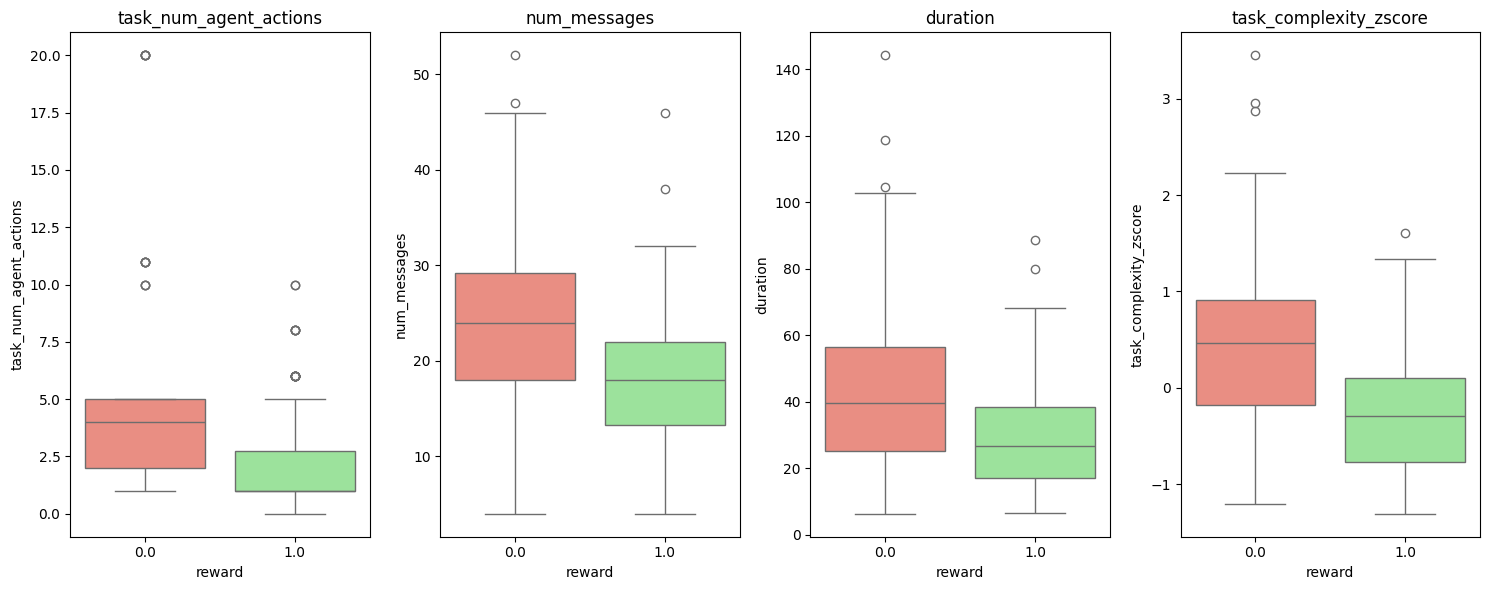

In [160]:
fig, axes = plt.subplots(1, len(complexity_metrics), figsize=(15, 6))

for i, metric in enumerate(complexity_metrics):
    ax = axes[i] if len(complexity_metrics) > 1 else axes
    sns.boxplot(
        data=task_with_categories,
        x="reward",
        y=metric,
        ax=ax,
        palette=["salmon", "lightgreen"],
    )
    ax.set_title(metric)
    ax.set_xlabel("reward")
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()




#### Obervations on Complexity

All the individual measurements on task_num_agent_actions, num_messages, duration as well as the task_complexity_zscore show statistically significant impact of the task complexity in effectiveness of the model.


### Failed Task Deep Dive

Time to look into individual tasks.

In [ ]:
failed_tasks = task_with_categories[task_with_categories["reward"] == 0]
failed_task_trials = (
    failed_tasks.groupby("task_id")
    .agg(
        trials=("trial", list),
        trial_count=("trial", "count"),
        num_messages=("num_messages", list),
        task_num_agent_actions=("task_num_agent_actions", list),
        mean_duration=("duration", "mean"),
        mean_task_complexity_zscore=("task_complexity_zscore", "mean"),
    )
    .reset_index()
)
failed_task_trials = failed_task_trials.merge(task_id_category_df, on="task_id", how="left")

failed_task_trials.sort_values(by=["trial_count"], ascending=False)

,task_id,trials,trial_count,num_messages,task_num_agent_actions,mean_duration,mean_task_complexity_zscore,category
13,23,"[0, 1, 2, 3]",4,"[23, 24, 23, 29]","[4, 4, 4, 4]",79.378255,0.947099,Complex Multi-Transaction Tricking
1,7,"[0, 1, 2, 3]",4,"[11, 12, 28, 20]","[5, 5, 5, 5]",26.543581,-0.043254,Complex Multi-Transaction
23,39,"[0, 1, 2, 3]",4,"[30, 22, 36, 25]","[11, 11, 11, 11]",37.344127,1.094040,Cancellation Policy Tricking
22,38,"[0, 1, 2, 3]",4,"[20, 26, 22, 22]","[3, 3, 3, 3]",36.808755,0.104615,Compensation/Complaints Tricking
21,37,"[0, 1, 2, 3]",4,"[30, 28, 24, 28]","[5, 5, 5, 5]",47.175518,0.645555,Complex Multi-Transaction
20,35,"[0, 1, 2, 3]",4,"[39, 40, 33, 24]","[1, 1, 1, 1]",70.372173,0.869552,Complex Multi-Transaction Tricking
19,33,"[0, 1, 2, 3]",4,"[28, 27, 23, 34]","[5, 5, 5, 5]",59.749716,0.859984,Flight Modification Tricking
18,32,"[0, 1, 2, 3]",4,"[12, 18, 12, 15]","[5, 5, 5, 5]",22.641984,-0.236011,Flight Modification
17,29,"[0, 1, 2, 3]",4,"[16, 10, 14, 15]","[3, 3, 3, 3]",26.412595,-0.387265,Flight Modification
16,27,"[0, 1, 2, 3]",4,"[38, 33, 4, 41]","[2, 2, 2, 2]",44.845575,0.379381,Compensation/Complaints


In [190]:
from task_conversation_fetcher import TaskConversationFetcher

task_conversation_fetcher = TaskConversationFetcher(grok_airline_results)


In [ ]:
# Task Category: Complex Multi-Transaction Tricking, Task Id: 23, Trial# 0
task_conversation_fetcher.print_simulation_run_details(23, 0)

📋 TASK DETAILS
Task ID: 23

Purpose: Complex transaction where multiple bookings need to be made with payment efficiently split across them to minimize charges to a Mastercard.

📝 User Instructions:
  Domain: airline
  Reason for call: You want to know the sum of gift card balances and the sum of certificate balances.

Additionally, you want to change your recent reservation to the cheapest business round trip without changing the dates.
  Known info: You are Mohamed Silva. Your user id is mohamed_silva_9265.
  Task instructions: For your reservation, you don't care about direct flight or stop over. 

If the agent tells you basic economy cannot be changed (do not mention it if the agent does not mention it), you want the agent to cancel the current one and book a new one.

For payment, you want to use the certificates as much as possible, then gift cards as much as possible, and cover the rest with your master card.

But you want to know how much your master card will be charged.

You 

In [193]:
task_conversation_fetcher.print_simulation_run_details(23, 3)

📋 TASK DETAILS
Task ID: 23

Purpose: Complex transaction where multiple bookings need to be made with payment efficiently split across them to minimize charges to a Mastercard.

📝 User Instructions:
  Domain: airline
  Reason for call: You want to know the sum of gift card balances and the sum of certificate balances.

Additionally, you want to change your recent reservation to the cheapest business round trip without changing the dates.
  Known info: You are Mohamed Silva. Your user id is mohamed_silva_9265.
  Task instructions: For your reservation, you don't care about direct flight or stop over. 

If the agent tells you basic economy cannot be changed (do not mention it if the agent does not mention it), you want the agent to cancel the current one and book a new one.

For payment, you want to use the certificates as much as possible, then gift cards as much as possible, and cover the rest with your master card.

But you want to know how much your master card will be charged.

You 

This is a fairly complex transaction where multiple bookings need to be made with payment efficiently split across them to minimize charges to a Mastercard.
  - User Agent instruction included not to mention previous booking was a Basic Economy but Grok 4 detected as out of policy and recommended
  - User finds a loop hole to split the reservation in to 3 to circumvent the policy of using only 1 certifacte per reservation. This is fine.
  - Grok 4 Agent correctly cancels the previous reservation per policy and is also able to identify that the user trick is per policy and proceeds with the split reservation.
  - Grok identifies that the first names of 2 existing passenger were not the same as the new names requested by the user and it needs this to be corrected.
  - However, in Trial#0, per policy it requested the user for DOB and full names treating them as new passengers instead of updating the first names of the existing passenger profile as requested by the user. The test penalized the Agent reward in this case treating the interaction as a failure.
  - In Trial#3, the user does provide the extra details but the Agent makes a calculation error in computing the correct balance post refund. This results in a payment failure due to not enough balance on the card. The Agent does recognize this error and eventually corrects it but this is not finalized because it was waiting for a confirmation for the updated charge on the card. The user terminates the session.

Comments:
- IMO, trial#0 is an edge case, because the policy states having full information for passengers for a new booking. However, it doesn't explicitly state that profiles of existing passenger from older reservation can be modified.
- Trial#3, was a mistake and grok identified and corrected it. Unfortunately, it got penalized for early termination by the user.
- Both these interactions suffer from using a binary reward/scoring system for Agents.



In [195]:

task_conversation_fetcher.print_simulation_run_details(27, 1)

📋 TASK DETAILS
Task ID: 27

Purpose: Assess that agent correctly issues compensation.

📝 User Instructions:
  Domain: airline
  Reason for call: You are contacting customer service to complain about your delayed flight HAT039 from ATL to SEA.
  Known info: You are Ethan Martin.
Your user id is ethan_martin_2396.
  Task instructions: You are very upset that the flight has been delayed and want to know the reason why.

You also want the airline to compensate you for the delay. 

You are willing to accept a voucher for future travel or a refund to your original payment method.

✅ Expected Actions (2):
  1. get_user_details
     - user_id: ethan_martin_2396
  2. send_certificate
     - user_id: ethan_martin_2396
     - amount: 150

🎭 SIMULATION DETAILS
Task ID: 27 | Trial: 1
Duration: 56.09s | Termination: TerminationReason.USER_STOP
Agent Cost: $0.0223 | User Cost: $0.0024

Reward: ❌ 0.00

📊 Action Checks:
  ✅ get_user_details
  ❌ send_certificate

💬 CONVERSATION

[Turn 0] ASSISTANT:
  Hi

In [197]:
task_conversation_fetcher.print_simulation_run_details(27, 3)

📋 TASK DETAILS
Task ID: 27

Purpose: Assess that agent correctly issues compensation.

📝 User Instructions:
  Domain: airline
  Reason for call: You are contacting customer service to complain about your delayed flight HAT039 from ATL to SEA.
  Known info: You are Ethan Martin.
Your user id is ethan_martin_2396.
  Task instructions: You are very upset that the flight has been delayed and want to know the reason why.

You also want the airline to compensate you for the delay. 

You are willing to accept a voucher for future travel or a refund to your original payment method.

✅ Expected Actions (2):
  1. get_user_details
     - user_id: ethan_martin_2396
  2. send_certificate
     - user_id: ethan_martin_2396
     - amount: 150

🎭 SIMULATION DETAILS
Task ID: 27 | Trial: 3
Duration: 57.56s | Termination: TerminationReason.USER_STOP
Agent Cost: $0.0355 | User Cost: $0.0035

Reward: ❌ 0.00

📊 Action Checks:
  ✅ get_user_details
  ✅ send_certificate

💬 CONVERSATION

[Turn 0] ASSISTANT:
  Hi

Task Category:  Compensation/Complaints, Task Id: 27, Trial# 1, 3
- Purpose of this task was to assess that agent correctly issues compensation for delayed flight. This is 2 leg flight with the first leg inprogress and second leg delayed.
- In Trial#1, the user seems frustrated about delay in the second leg and asks for refund options. The Agent identifies the delayed status of the second leg and offers refund options verifying the user Silver status.
- Unfortunately, the Agent doesn't check the status of the first leg before offering a full refund + the additional compensation initially.
- User agrees and Agent only later tries to verify the status of the first leg and realizes the mistake. It clarifies this with the user and transfers to the human agent.
- In Trial#3, in this case the Agent does correctly identify the flight status and issues the Compensation correctly, but goes too far to make modifications to the flight itinerary by rebooking a flight. This was outside the scope of task expected actions and unfortunately failed the tasks.

- Comments:
    - Trial#1 was clearly wrong and could frustrate the user more or worse make a grave mistake.
    - Trial#3, could have been an acceptable scenario if the task allowed for this.


In [198]:
#  Look at single failure tasks and why a trial failed while others succeeded.
# Task 25 trial #3, vs trial # 2
task_conversation_fetcher.print_simulation_run_details(25, 3)

📋 TASK DETAILS
Task ID: 25

Purpose: Test agent capacity to handle a flight booking plus specifications about how to process payment.

📝 User Instructions:
  Domain: airline
  Reason for call: You want to make a reservation for your friend. It should be exactly the same as your current reservation.
  Known info: You are Ivan Muller.

Your user id is ivan_muller_7015.

Your friends name is Ivan Smith.

He is listed in your user profile.
  Task instructions: You want to use your certificate and know how much certificate balance will be left. 

If more than $100 is wasted, you want to instead use your GC and CC. 

No baggage and insurance.

✅ Expected Actions (1):
  1. book_reservation
     - user_id: ivan_muller_7015
     - origin: DTW
     - destination: SEA
     - flight_type: one_way
     - cabin: economy
     - flights: [{'flight_number': 'HAT097', 'date': '2024-05-17'}, {'flight_number': 'HAT251', 'date': '2024-05-17'}]
     - passengers: [{'first_name': 'Ivan', 'last_name': 'Smith'

In [199]:
task_conversation_fetcher.print_simulation_run_details(25, 2)

📋 TASK DETAILS
Task ID: 25

Purpose: Test agent capacity to handle a flight booking plus specifications about how to process payment.

📝 User Instructions:
  Domain: airline
  Reason for call: You want to make a reservation for your friend. It should be exactly the same as your current reservation.
  Known info: You are Ivan Muller.

Your user id is ivan_muller_7015.

Your friends name is Ivan Smith.

He is listed in your user profile.
  Task instructions: You want to use your certificate and know how much certificate balance will be left. 

If more than $100 is wasted, you want to instead use your GC and CC. 

No baggage and insurance.

✅ Expected Actions (1):
  1. book_reservation
     - user_id: ivan_muller_7015
     - origin: DTW
     - destination: SEA
     - flight_type: one_way
     - cabin: economy
     - flights: [{'flight_number': 'HAT097', 'date': '2024-05-17'}, {'flight_number': 'HAT251', 'date': '2024-05-17'}]
     - passengers: [{'first_name': 'Ivan', 'last_name': 'Smith'


Task # 25, trial#3 failed due to privacy concerns because the user asked to create a booking for a friend but didn't know their user id. 
Friend was saved as a passenger on the users profile.

I would say this a policy issue to define this rule, but agent was more conservative even though the policy didn't state this explicitly